## Import libraries

In [1]:
import numpy as np
from scipy import misc
from matplotlib import pylab as plt
import matplotlib.cm as cm
from math import sqrt
import sklearn.linear_model
%matplotlib inline

/Users/francescoperera/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


## Import train and test data

In [2]:
trainFile = "./faces/train.txt"
testFile = "./faces/test.txt"

## b) load train  and test files and transform them into  2500 dimensional vectors. Plot a sample image.

In [22]:
def transformData(f):
    '''
    functions takes a file and splits into labels and feature matrix.
    '''
    featureVecs =[]
    labels =[]
    for line in open(f):
        image = misc.imread(line.strip().split()[0])
        featureVecs.append(image.reshape(2500,))
        labels.append(line.strip().split()[1])
    return np.array(featureVecs, dtype=float), np.array(labels, dtype=int)
    

In [23]:
trainData, trainLabels = transformData(trainFile)
print trainData.shape,trainLabels.shape

(540, 2500) (540,)


In [24]:
testData, testLabels = transformData(testFile)
print testData.shape,testLabels.shape

(100, 2500) (100,)


In [25]:
def plotImage(imageVector):
    '''
    plotImage takes a row vector , reshapes it and plots the image.
    '''
    plt.imshow(imageVector.reshape(50,50),cmap = cm.Greys_r)
    plt.show()

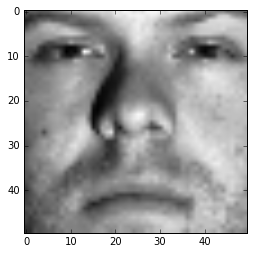

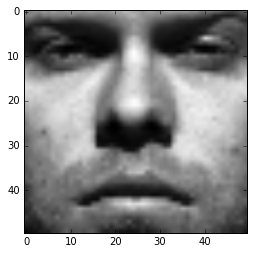

In [26]:
plotImage(trainData[1,:])
plotImage(testData[0,:])

## c) Average face

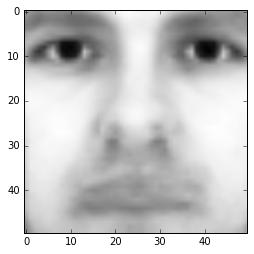

In [27]:
#the average face is calculating by taking the average value of each column.
averageFace = np.mean(trainData,axis = 0)
plotImage(averageFace)

## d) Mean subtraction

In [28]:
def meanSubtraction(data,averageRow):
    '''
    meanSubtraction takes a matrix of rows and subtracts the average row from each of matrix row.
    '''
    newData = np.array([row - averageRow for row in data])
    return newData    

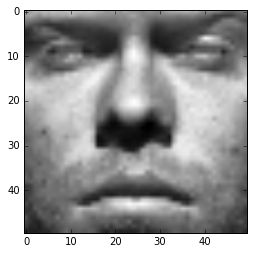

In [29]:
newTrain = meanSubtraction(trainData,averageFace)
newTest = meanSubtraction(testData,averageFace)

plotImage(newTrain[1,:])
plotImage(newTest[0,:])

## e) Eigenface

In [36]:
U,D,V = np.linalg.svd(trainData,full_matrices = 0)
Utest,Dtest,Vtest = np.linalg.svd(testData,full_matrices = 0)

def displayEigenFace(matrix,numFaces):
    '''
    displayEigenFace plots the first numFaces(number of faces)faces
    '''
    for i in range(numFaces):
        plotImage(matrix[i,:])

In [104]:
#check the size of the U,D,V
print U.shape,Utest.shape
print D.shape,Dtest.shape
print V.shape,Vtest.shape

(540, 540) (100, 100)
(540,) (100,)
(540, 2500) (100, 2500)


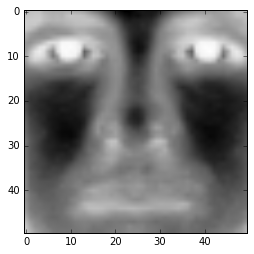

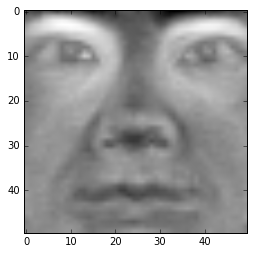

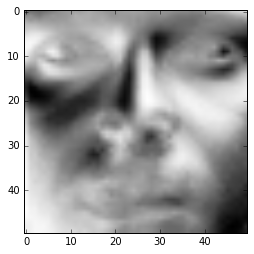

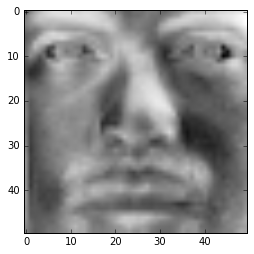

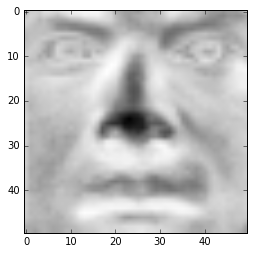

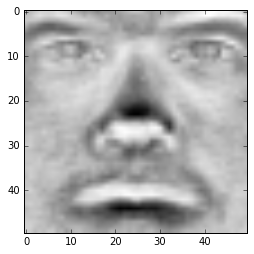

In [38]:
displayEigenFace(V,10)

## f) Low-rank Approximation

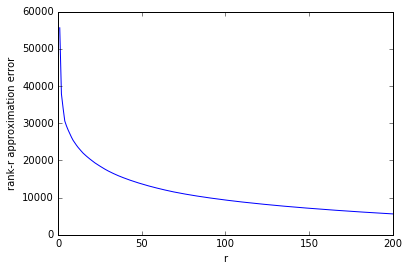

In [39]:
def getRankRApproximation(X,U,D,V,rval):
    '''
    using the output of the SVD,getRankRApproximation calculates the rank R Approximation error between X and Xr
    '''
    rankRApproxError = []
    for r in range(1,rval+1):
        Xr = np.dot(U[:,:r] * D[:r],V[:r,:])
        rankRApproxError.append(np.linalg.norm(X-Xr))
    return rankRApproxError
        
def plotApproximationError(errorList,rval):
    plt.plot(range(1,rval+1),errorList)
    plt.xlabel("r")
    plt.ylabel("rank-r approximation error")
    plt.show()

rValue = 200
approxError = getRankRApproximation(trainData,U,D,V,rValue)
plotApproximationError(approxError,rValue)
        

## g) Eigenface Feature

In [103]:
print Vtest.shape

(100, 2500)


In [123]:
def getFeatureMatrix(x,v,r):
    '''
    getFeatureMatrix transforms x into a matrix of eigenface features by computing the dot product between
    the matrix x and  and transpose of v.
    '''
    return np.dot(x,np.array(v[:r,:]).T)

In [124]:
fTrain= getFeatureMatrix(trainData,V,200)
fTest = getFeatureMatrix(testData,V,200)

In [125]:
print fTrain.shape
print fTest.shape

(540, 200)
(100, 200)


## h) Face Recognition

In [126]:
def plotAccuracy(acc,r):
    '''
    creates a plot where r represents x-axis and acc are the y axis values
    '''
    rList = range(1,r+1)
    plt.plot(rList,acc)
    plt.xlabel('r')
    plt.ylabel('classification accuracy')
    plt.show()

(540, 200) (540,)
(100, 200) (100,)


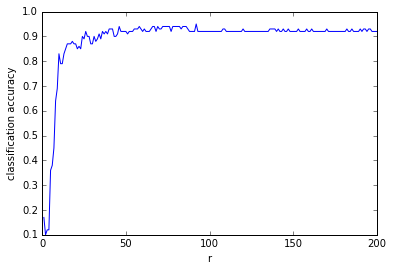

In [127]:
print fTrain.shape,trainLabels.shape
print fTest.shape,testLabels.shape

def getAccuracyList(train,test,trainLabels,testLabels,v,rVal):
    '''
    getAccuracyList takes the train,test data and labels. It uses them to build and score a logistic
    regression model over a range of r values.
    '''
    accuracyList = []
    for i in range(1,rVal+1):
        F = getFeatureMatrix(train,V,i)
        Ftest = getFeatureMatrix(test,V,i)
        meanAcc = sklearn.linear_model.LogisticRegression().fit(F,trainLabels).score(Ftest,testLabels)
        accuracyList.append(meanAcc)
    return accuracyList

accuracy = getAccuracyList(trainData,testData,trainLabels,testLabels,V,rValue)
plotAccuracy(accuracy,rValue)
